# Inteligencia Artificial
### Ingeniería civil en Computación e Informática, Universidad Mayor

## **Introducción**

El reciente y trágico incidente en el que un submarino implosionó mientras intentaba descender a las profundidades para observar los restos del Titanic nos ha recordado de nuevo el atractivo persistente y el peligro mortal del naufragio más famoso del mundo. Con la noticia aún fresca en nuestra mente, curoseando por las paginas que recomendó el profesor descubrimos que Kaggle tenía una competición abierta basada en los datos del Titanic. Fue una coincidencia que nos impulsó a explorar este conjunto de datos en un esfuerzo por entender y quizás, a nuestra manera, rendir "homenaje" a las vidas perdidas tanto en el incidente original como en los esfuerzos recientes por descubrir su historia.

![Submarino OceanGate](https://phantom-elmundo.unidadeditorial.es/8a87038723fdb1e9d79e29f46f2ac139/resize/473/f/webp/assets/multimedia/imagenes/2023/06/23/16875440094856.jpg)

En este trabajo, nosotros, dos "wannabes" Data-Sciencist, decidimos aplicar nuestros conocimientos recientemente adquiridos para abordar este desafío. Nuestra elección de herramienta para este estudio es la red neuronal. A través de su notable habilidad para modelar relaciones complejas y no lineales, esperamos descubrir patrones ocultos que puedan mejorar nuestra comprensión de las trágicas circunstancias que rodearon el hundimiento del "Titanic"

El objetivo de este notebook es presentar nuestro aprendizaje obtenido de la metodología CRISP-DM para resolver los problema. Aquí presentamos cómo manejamos cada etapa, desde la comprensión del problema y la preparación de los datos hasta el modelado y la evaluación de los resultados. Nuestra intención no es solo predecir quién sobreviviría al desastre, sino también comprender las interacciones de las variables que pueden haber influido en este fatal desenlace.

Si bien nuestra meta es meramente académica y buscamos profundizar en nuestras habilidades y conocimientos en Machine Learning, también nos damos cuenta de que este proyecto tiene una dimensión humana más profunda. A través de este trabajos, esperamos no solo aprender, sino también honrar desde el mero respeto, la memoria de aquellos que han perdido sus vidas en el "Titanic".

![Titanic](https://images.ecestaticos.com/_IIdhvreznM8JeqBnY4N9qn9iZw=/96x26:2137x1557/557x418/filters:fill(white):format(jpg)/f.elconfidencial.com%2Foriginal%2Fc8a%2F480%2Fcda%2Fc8a480cda6a9078c83c84fb3a418531f.jpg)


## **1.- Descripción del problema o Compresión del negocio**

La presente competencia planteada para nuestro proyecto, forma parte de las competencias abiertas de Kaggle, especificamente en la sección "Getting Started".\
\
Para entrar algo en historia y tener un contexto de el problema, el hundimiento del Titanic fue una tragedia marítima que ocurrió en la noche del 14 al 15 de abril de 1912 en el Atlántico Norte, durante su viaje inaugural desde Southampton a Nueva York. Más de 1,500 de los aproximadamente 2,224 pasajeros y tripulantes a bordo perecieron en el hundimiento, lo que lo convierte en una de las peores catástrofes marítimas en la historia.

Nuestro problema es un problema de clasificación binaria, donde el objetivo es predecir si un pasajero del Titanic sobrevivirá o no, basándonos en las características proporcionadas en el dataset. Estamos interesados no sólo en la precisión de nuestras predicciones, sino también en entender qué variables contribuyen más a la supervivencia, para así obtener un mayor entendimiento de los patrones y relaciones que pudieron haber afectado los resultados de aquel trágico día.

Este análisis no sólo servirá para aumentar nuestra comprensión sobre el hundimiento del Titanic, sino que también puede proporcionar insights para futuros estudios de predicción de supervivencia en situaciones de desastre.


## **2.- Compresión de los datos**

Para nuestra tarea de predicción, contamos con tres conjuntos de datos proporcionados por la competencia de Kaggle

* ***Conjunto de entrenamiento (train.csv):*** Este conjunto de datos incluye varios atributos de los pasajeros del Titanic, junto con la información sobre si sobrevivieron o no. Este será el conjunto de datos principal que utilizaremos para entrenar nuestro modelo de red neuronal.

* ***Conjunto de pruebas (test.csv):*** Este conjunto de datos también incluye varios atributos de los pasajeros, pero a diferencia del conjunto de entrenamiento, no incluye la información sobre si sobrevivieron. Este conjunto de datos nos permitirá evaluar qué tan bien nuestro modelo puede predecir la supervivencia de pasajeros basándose en los atributos proporcionados.

* ***Ejemplo de presentación (gender_submission.csv):*** Este archivo es un ejemplo de cómo debería verse el archivo de presentación final. Predice la supervivencia basada únicamente en el género, asumiendo que todas las mujeres sobreviven y todos los hombres perecen.

El desafío aquí es entender cómo estos diversos atributos pueden influir en la probabilidad de supervivencia de un pasajero y cómo podemos usar esta información para entrenar un modelo de machine learning que pueda hacer predicciones precisas. Para ello, comenzaremos con un análisis exploratorio de datos, seguido de preprocesamiento de datos y finalmente, la construcción y evaluación del modelo.

***A continuación haremos los correspondientes analisis exploratorios de los datos.***

In [1]:
#Cargamos las librerias que utilizaremos en el proyecto.
import pandas as pd
from IPython.display import display #Se utilizará para mostrar en un mismo output varias salidas.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Quitamos las alertas
import warnings
warnings.filterwarnings('ignore')


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

#Vemos las priemras columnas de data
display(train.head())

#Mostramos la info de el df
display(train.info())

#Msotramos la cantidad de filas y columnas del df llamado train
display(train.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

(891, 12)

Ahora bien, los atributos que se visualizaron en estos conjuntos de datos incluyen


>**PassengerId:** Un identificador único para cada pasajero.\
**Survived:** Si el pasajero sobrevivió o no (0 = No, 1 = Sí).\
**Pclass:** Clase de billete, un indicador del estatus socioeconómico del pasajero (1 = Alta, 2 = Media, 3 = Baja).\
**Name:** Nombre del pasajero.\
**Sex:** Género del pasajero.\
**Age:** Edad del pasajero. Si es menos de 1, es fraccional. Las edades estimadas están en la forma de xx.5.\
**SibSp:** Número de hermanos/cónyuges a bordo.\
**Parch:** Número de padres/hijos a bordo.\
**Ticket:** Número de billete.\
**Fare:** Tarifa del pasajero.\
**Cabin:** Número de cabina.\
**Embarked:** Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).\

* Observamos además que existe una cantidad total de 891 filas y 12 columnas dentro de nuestro dataframe llamado "train"

Entendiendo el significado de cada variable, procederemos a verificar si existe algún dato nulo dentro de nuestro dataset

In [3]:
datos_nulos = train.isnull().sum()

# Cliclo del recuento de datos nulos por columna
for columna, recuento in datos_nulos.items():
    print(f"La columna '{columna}' tiene {recuento} valores nulos.")

La columna 'PassengerId' tiene 0 valores nulos.
La columna 'Survived' tiene 0 valores nulos.
La columna 'Pclass' tiene 0 valores nulos.
La columna 'Name' tiene 0 valores nulos.
La columna 'Sex' tiene 0 valores nulos.
La columna 'Age' tiene 177 valores nulos.
La columna 'SibSp' tiene 0 valores nulos.
La columna 'Parch' tiene 0 valores nulos.
La columna 'Ticket' tiene 0 valores nulos.
La columna 'Fare' tiene 0 valores nulos.
La columna 'Cabin' tiene 687 valores nulos.
La columna 'Embarked' tiene 2 valores nulos.


Al analizar nuestros datos, encontramos que la columna "Cabin" presenta una cantidad significativa de datos nulos, alcanzando los 687. Esta cifra representa más del 50% del total de nuestros datos, lo cual supone una gran limitación al momento de construir nuestro modelo predictivo. Es por esto que tomamos la decisión de eliminarla del conjunto de características a considerar, para poder mantener la consistencia y precisión de nuestro análisis.

Por otro lado, al observar la columna "Age", nos encontramos con 177 datos nulos. Aunque esta cifra pueda parecer elevada a primera vista, es importante recordar que la variable 'Age' puede tener un impacto significativo en nuestro modelo. Durante el trágico hundimiento del Titanic, la regla de oro para el rescate era "mujeres y niños primero". Esto indica que la edad podría desempeñar un papel crucial en la predicción de la supervivencia de un pasajero.

Por tanto, en lugar de eliminar la variable 'Age' de nuestro conjunto de datos, optaremos por una estrategia de imputación de los valores faltantes. Esto nos permitirá conservar esta característica potencialmente valiosa en nuestro análisis, asegurando al mismo tiempo la integridad de nuestros datos.

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Este resumen estadístico ofrece varios puntos clave:

* Survived: Sólo alrededor del 38% de los pasajeros sobrevivieron, lo que indica que nuestra variable objetivo está un poco desbalanceada.

* Pclass: La mayoría de los pasajeros estaban en la 2da y 3ra clase, sugiriendo que la clase social puede influir en la supervivencia.

* Age: La media de edad es de 30 años, pero faltan valores que debemos tratar.

* SibSp & Parch: La mayoría de los pasajeros viajaban solos. Esto puede influir en la probabilidad de supervivencia.

* Fare: Existe una alta variabilidad en los precios de los billetes, lo que indica que hay valores atípicos que podríamos necesitar manejar.

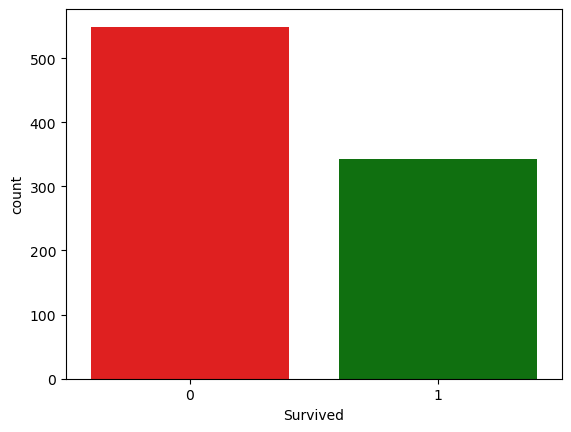

0    549
1    342
Name: Survived, dtype: int64


In [5]:
sns.countplot(data=train, x="Survived", palette=["Red", "Green"]) #Mostramos grafico de barras los que sobrevivieron y los que no.
plt.show()
print(train.Survived.value_counts())#Imprimimos el número exacto.

Concluimos que como se prevee por sentido común, la cantidad de pasajeros que sobrevivieron a la catastrofe fue mucho menor comparado con los supervivientes.

male      577
female    314
Name: Sex, dtype: int64


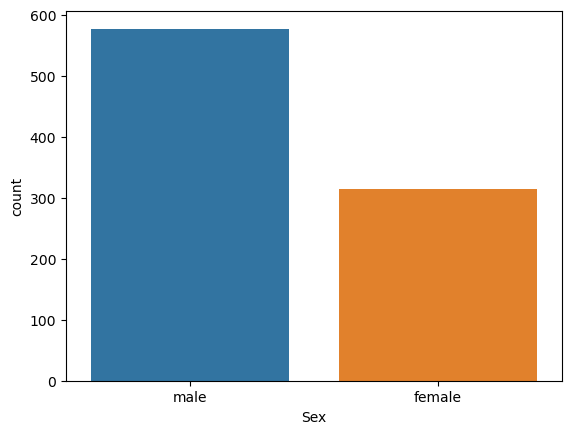

In [6]:
sns.countplot(x='Sex',data=train)
print(train.Sex.value_counts())

En el dataset train existe una mayor cantidad de género masculino exactamente 577 hombres y 314 mujeres

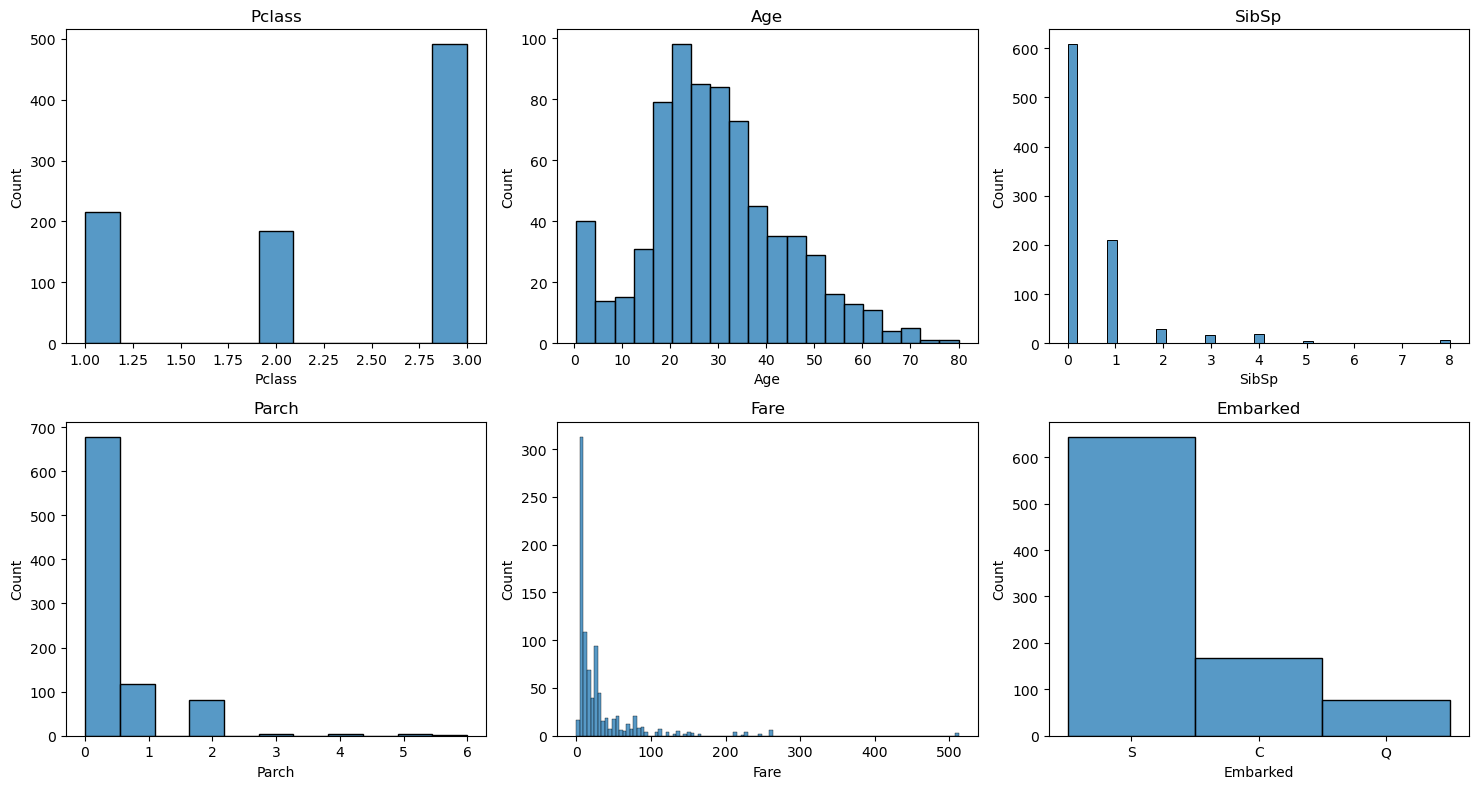

In [7]:
plt.figure(1, figsize=(15, 8))
for i, x in enumerate(['Pclass', 'Age','SibSp','Parch','Fare','Embarked']):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    sns.histplot(train[x])
    plt.title('{}'.format(x))
plt.show()

Estas visualizaciones gráficas nos ofrecen una imagen clara de la distribución de los datos y nos ayudan a vislumbrar las características de los pasajeros del Titanic. La mayoría de los pasajeros, como se refleja en el gráfico de 'Age', eran jóvenes adultos en el rango de 20 a 30 años, lo que nos habla de un grupo demográfico dinámico y probablemente enérgico. (Quizás por ser los que trabajaban dentro del Titanic, como así lo refleja la película dirigida por JJames Cameron)

* Además, una cantidad significativa de pasajeros, más de 500, pertenecían a la clase baja, como se muestra en el gráfico de 'Pclass'. Este punto es crucial, ya que evidencia una clara mayoría socioeconómica de clase baja a bordo del Titanic.

* Estos patrones nos permiten comprender mejor los matices de nuestro conjunto de datos y nos proporcionan la base para construir un modelo predictivo sólido y realista. En nuestro enfoque, es esencial ser conscientes de estas tendencias y considerar su impacto en la tasa de supervivencia.

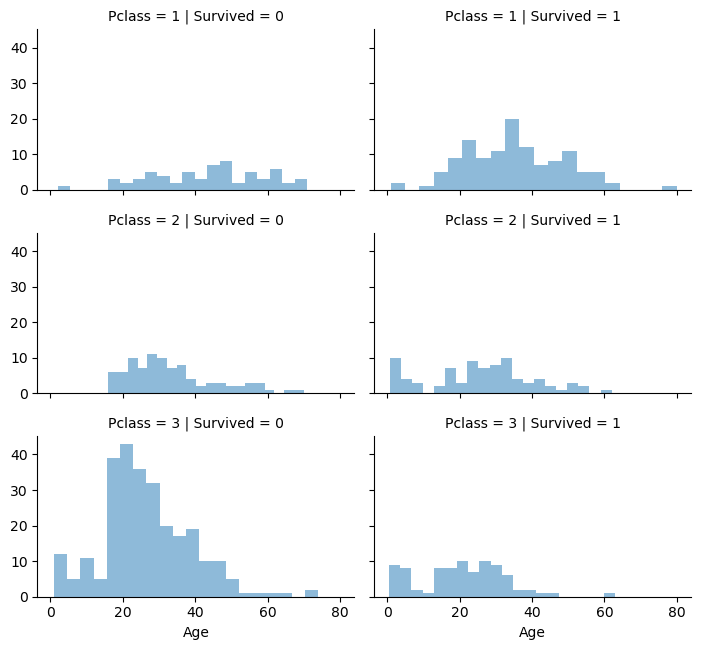

In [8]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()


>Este análisis gráfico nos permite descubrir patrones significativos y interesantes en los datos del Titanic. Al mirar la distribución de la edad y la supervivencia por clase "Pclass", vemos una evidente disparidad que nos habla sobre la naturaleza estratificada de la sociedad a principios del siglo XX, evidenciada por la tragedia del Titanic.
>
>Los pasajeros de la clase 3, que representa la clase socioeconómica más baja, muestran la tasa más alta de no supervivencia, independientemente de su edad. Este patrón puede hablar de varias posibilidades. Tal vez estas personas no tuvieron acceso a los botes salvavidas o simplemente se encontraban en una posición desfavorable en el barco que dificultaba su evacuación.
>
>Por el contrario, los pasajeros de la clase 1, que representan la clase socioeconómica más alta, muestran una tendencia hacia una mayor tasa de supervivencia. Este hecho no es un accidente de la historia, y aunque nos gustaría pensar que en una situación de vida o muerte todos tendrían las mismas posibilidades, los datos cuentan una historia diferente.
>
>¿Significa esto que el dinero puede comprar la vida? No exactamente, pero es una clara indicación de cómo las estructuras de poder y los privilegios pueden influir en quién tiene más probabilidades de sobrevivir en una crisis. Es un recordatorio de que, incluso en situaciones de desastre, la clase social puede jugar un papel en la determinación de quién vive y quién muere.
>
>Este análisis inicial nos permite entender la importancia de la variable "Pclass" en nuestro modelo y enfatiza la necesidad de considerarla al desarrollar nuestras predicciones. Es un reflejo de la trágica realidad del Titanic, pero también un espejo de las desigualdades existentes en la sociedad. 

In [9]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Analizando la tabla de correlación podemos concluir lo siguiente:

* ***'Survived' y 'Pclass'*** tienen una correlación negativa de -0.338481, lo que indica que cuanto mayor es la clase (donde 1 es la más alta y 3 es la más baja), menor es la tasa de supervivencia. Esto respalda nuestro análisis anterior sobre la influencia de la clase social en la supervivencia.

* ***'Survived' y 'Fare'*** tienen una correlación positiva de 0.257307, lo que sugiere que los pasajeros que pagaron tarifas más altas tenían más probabilidades de sobrevivir. Esto puede ser otro indicativo del impacto de la clase social, ya que las tarifas más altas probablemente correspondan a las clases superiores.

* ***'SibSp' y 'Parch'*** tienen una correlación positiva de 0.414838, lo que indica que aquellos con cónyuges o hermanos a bordo (SibSp) también eran más propensos a tener padres o hijos a bordo (Parch). Esto tiene sentido, ya que las familias viajarían juntas.

* ***'Pclass' y 'Fare'*** tienen una fuerte correlación negativa de -0.549500, lo que indica que los pasajeros de clases superiores (que se representan con números más bajos) pagaron tarifas más altas.

* ***'Age' y 'Pclass'*** también tienen una correlación negativa de -0.369226, lo que puede sugerir que los pasajeros de mayor edad son más propensos a estar en clases superiores.

## **3.- Preparación de los datos**

In [10]:
display(train.shape)
train_df = train.drop_duplicates()#Eliminamos datos duplicados de nuestro dataset train
display(train.shape)

(891, 12)

(891, 12)

Observamos que el tamaño del dataframe se mantiene sin cambios.

In [11]:
print('Antes de eliminar la data de "train" : ' + str(train.shape))
print('Antes de eliminar la data de "test" ' + str(test.shape))

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

print('\nDespues de eliminar los datos de "train": ' + str(train.shape))
print('Despues de eliminar los datos de "test": ' + str(test.shape))

Antes de eliminar la data de "train" : (891, 12)
Antes de eliminar la data de "test" (418, 11)

Despues de eliminar los datos de "train": (891, 10)
Despues de eliminar los datos de "test": (418, 9)


Ahora bien, ¿Por qué decidimos descartar las varibales "Ticket" y "Cabin"?. Por las siguientes razones.
> *    ***Alto porcentaje de valores faltantes***: En particular, la columna 'Cabin' tiene un alto número de valores faltantes. Para el conjunto de datos del Titanic, más del 70% de los datos de la columna 'Cabin' están perdidos. Lidiar con una cantidad tan grande de datos faltantes puede ser complejo para nuestro proyecto y puede introducir ruido innecesario en el modelo.
>
>* ***Baja relevancia para la predicción: La columna 'Ticket'***, que representa el número de ticket de un pasajero, parece no tener una correlación clara y directa con la supervivencia del pasajero. Los números de los tickets son únicos y parecen ser aleatorios, lo que hace difícil extraer un patrón significativo de ellos.


In [12]:
#Definimos los numeros q definiran las categorias.
bins = [0, 20, 30, 40, 50, np.inf]
labels = ['0', '1', '2', '3', '4']
train['AgeBand'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeBand'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

#Remplaazamos los datos faltantes con la moda
age_moda = train['AgeBand'].mode()[0]
train['AgeBand'].fillna(age_moda, inplace=True)
age_moda = test['AgeBand'].mode()[0]
test['AgeBand'].fillna(age_moda, inplace=True)

#Volvemos a la columna Age
train['Age'] = train['AgeBand'].astype(int)
train.drop(['AgeBand'], axis=1, inplace=True)
test['Age'] = test['AgeBand'].astype(int)
test.drop(['AgeBand'], axis=1, inplace=True)

# Verificamos que no hayan quedado datos nulos
display(train['Age'].isnull().sum())


train.head()

0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,8.0500,S


* La característica "Age" se ha transformado en una variable categórica, lo que nos puede facilitar el modelado y la interpretación, ya que los patrones en los datos pueden ser más evidentes cuando se agrupan en categorías. Esta transformación también maneja el problema de los valores perdidos en nuestra variabel "Age".

In [13]:

# Impute missing value in test data for column 'Fare' with the median from train data
median_fare = train['Fare'].dropna().median()
test['Fare'].fillna(median_fare, inplace=True)

bins = [-np.inf, 7.91, 14.454, 31, np.inf]
labels = ['0', '1', '2', '3']
train['FareBand'] = pd.cut(train['Fare'], bins=bins, labels=labels, right=True)
test['FareBand'] = pd.cut(test['Fare'], bins=bins, labels=labels, right=True)

fare_mode = train['FareBand'].mode()[0]
train['FareBand'].fillna(fare_mode, inplace=True)
fare_mode = test['FareBand'].mode()[0]
test['FareBand'].fillna(fare_mode, inplace=True)

train['Fare'] = train['FareBand'].astype(int)
train.drop(['FareBand'], axis=1, inplace=True)
test['Fare'] = test['FareBand'].astype(int)
test.drop(['FareBand'], axis=1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,1,S


* La razón por la que realizamos esta binarización de la característica "Fare" es similar a por qué lo hicimos con 'Age'. La 'Fare' es una variable continua que podría tener una amplia gama de valores, lo cual podría causar problemas. Al convertir estas tarifas en distintos rangos, estamos simplificando nuestro modelo y posiblemente mejorando su rendimiento al reducir el ruido y los outliers.

In [14]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 8), (418, 8))

>Decidimos eliminar los nombres de los pasajeros porque consideramos que no aportan información relevante para nuestro modelo de predicción. En este contexto, el nombre de una persona no tiene un impacto directo en su probabilidad de supervivencia, por lo tanto, no es una característica significativa para nuestro análisis.
>
>Respecto a 'PassengerId', esta característica funciona más como una identificación numérica de los pasajeros que como un indicador predictivo. Como tal, no proporciona información valiosa para determinar la supervivencia de un individuo. Al eliminar estas características irrelevantes, simplificamos nuestro modelo, permitiendo que se enfoque en las características que tienen mayor probabilidad de influir en el resultado.

In [15]:
# Crear una nueva característica 'TamaniooFamilia' que combina 'Parch' (padres/hijos a bordo) y 'SibSp' (hermanos/cónyuges a bordo)
for dataset in [train, test]:
    dataset['TamanioFamilia'] = dataset['SibSp'] + dataset['Parch'] + 1

# Crear una nueva característica 'ViajaSolo' que indica si el pasajero viaja solo (es decir, si 'TamanioFamilia' es 1)
for dataset in [train, test]:
    dataset['ViajaSolo'] = 0
    dataset.loc[dataset['TamanioFamilia'] == 1, 'ViajaSolo'] = 1

# Eliminar las características 'Parch', 'SibSp' y 'TamañoFamilia' de los conjuntos de datos
train = train.drop(['Parch', 'SibSp', 'TamanioFamilia'], axis=1)
test = test.drop(['Parch', 'SibSp', 'TamanioFamilia'], axis=1)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,ViajaSolo
0,0,3,male,1,0,S,0
1,1,1,female,2,3,C,0
2,1,3,female,1,1,S,1
3,1,1,female,2,3,S,0
4,0,3,male,2,1,S,1


Este proceso se realizó con el objetivo de simplificar el conjunto de datos y potencialmente mejorar el rendimiento de nuestro modelo de predicción. Al combinar las características 'Parch' y 'SibSp' en una nueva característica 'TamañoFamilia', reducimos la dimensionalidad de nuestro conjunto de datos, lo que puede ayudar a prevenir el sobreajuste.

Además, creamos la característica 'ViajaSolo' porque podemos hipotetizar que el hecho de viajar solo o no podría afectar las posibilidades de supervivencia de un pasajero (por ejemplo, una persona que viaja sola podría tener menos posibilidades de sobrevivir que una persona que viaja con su familia, ya que esta última podría recibir ayuda de sus familiares). Por tanto, esta nueva característica podría ser útil para nuestro modelo de predicción.

Finalmente, después de crear estas nuevas características, eliminamos las características 'Parch', 'SibSp' y 'TamañoFamilia' originales, ya que su información ya está contenida en las nuevas características 'TamañoFamilia' y 'ViajaSolo', y mantenerlas solo duplicaría la información.

In [16]:
# Crear una nueva característica 'Edad*Clase' que es el producto de 'Edad' y 'Pclass'
for dataset in [train, test]:
    dataset['Edad*Clase'] = dataset.Age * dataset.Pclass

# Mostrar las primeras 10 filas de las características 'Edad*Clase', 'Edad', 'Pclass'
train.loc[:, ['Edad*Clase', 'Age', 'Pclass']].head(10)


,Edad*Clase,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,4,4,1
7,0,0,3
8,3,1,3
9,0,0,2


Este proceso se hizo para crear una característica de interacción entre 'Edad' y 'Pclass'. La idea detrás de esto es que la clase social podría tener un impacto diferente en la tasa de supervivencia dependiendo de la edad del pasajero. Por ejemplo, un niño de primera clase podría tener más posibilidades de sobrevivir que un adulto de tercera clase.

La nueva característica 'EdadClase' es simplemente el producto de 'Edad' y 'Pclass', lo que significa que un valor alto de 'EdadClase' correspondería a un pasajero más viejo en una clase más alta.

Por lo tanto, esta nueva característica podría potencialmente ser útil para nuestro modelo de predicción, ya que combina la información de las características 'Edad' y 'Pclass' de una manera que podría reflejar mejor su impacto conjunto en la tasa de supervivencia.

In [17]:
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,ViajaSolo,Edad*Clase
0,0,3,0,1,0,S,0,3
1,1,1,1,2,3,C,0,2
2,1,3,1,1,1,S,1,3
3,1,1,1,2,3,S,0,2
4,0,3,0,2,1,S,1,6


In [18]:
# Convertir la característica 'Embarked' a formato numérico
for dataset in [train, test]:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Mostrar las primeras filas del DataFrame de entrenamiento
train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,ViajaSolo,Edad*Clase
0,0,3,0,1,0,0,0,3
1,1,1,1,2,3,1,0,2
2,1,3,1,1,1,0,1,3
3,1,1,1,2,3,0,0,2
4,0,3,0,2,1,0,1,6


Al transformar estos valores categóricos en numéricos, facilitamos el trabajo para el algoritmo de aprendizaje automático y posiblemente mejoremos el rendimiento de nuestro modelo.

In [19]:
train["Survived"] = train["Survived"].astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,ViajaSolo,Edad*Clase
0,0,3,0,1,0,0,0,3
1,1,1,1,2,3,1,0,2
2,1,3,1,1,1,0,1,3
3,1,1,1,2,3,0,0,2
4,0,3,0,2,1,0,1,6


## **4.- Modelado**

Aquí, creamos un modelo de red neuronal usando una estructura muy común llamada red neuronal densa. La usamos porque el problema que estamos tratando de resolver no es tan complicado como para necesitar arquitecturas más avanzadas y complejas como CNN o RNN.

En nuestro modelo, agregamos varias capas densas. Las capas densas son como grupos de neuronas que trabajan juntas para aprender de los datos. Duplicamos la cantidad de neuronas en la segunda capa a 64 para permitir que la red capture características más complejas. Pero también agregamos lo que llamamos capas de "Dropout". Para entenderlo mejor y hacerlo más didactico para nuestro entendimiento imaginemos que en un equipo de trabajo, si un miembro se vuelve demasiado dominante, el equipo podría depender demasiado de él. En el ML, eso se llama sobreajuste, y queremos evitarlo. Entonces, las capas de Dropout "desconectan" aleatoriamente algunas neuronas durante el entrenamiento para asegurar que todas las neuronas de la red participen y eviten el sobreajuste.

Finalmente, al final de la red, tenemos una sola neurona que nos da la predicción final del modelo: si el pasajero sobrevivirá o no en el Titanic. Para esta última capa, utilizamos una función de activación "sigmoid" porque queremos que la salida sea una probabilidad entre 0 y 1. Esto encaja perfectamente con nuestro objetivo de predecir si un pasajero sobrevivirá (1) o no (0).

In [20]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler_min_max = MinMaxScaler()

X_train = scaler_min_max.fit_transform(X_train)
X_test = scaler_min_max.transform(X_test)

In [22]:
model= tf.keras.models.Sequential()

# Primera capa oculta
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Capa de regularización dropout
model.add(tf.keras.layers.Dropout(0.2))

# Segunda capa oculta
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Capa de regularización dropout
model.add(tf.keras.layers.Dropout(0.2))

# Tercera capa oculta
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Capa de salida
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Añadir regularización al optimizador
optimizador = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Accuracy'])


In [23]:

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 32, epochs = 200)


Epoch 1/200
23/23 [==============================] - 1s 7ms/step - loss: 0.6745 - Accuracy: 0.5815 - val_loss: 0.6395 - val_Accuracy: 0.6369
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6195 - Accuracy: 0.6896 - val_loss: 0.5756 - val_Accuracy: 0.7598
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5660 - Accuracy: 0.7247 - val_loss: 0.5026 - val_Accuracy: 0.7654
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5165 - Accuracy: 0.7640 - val_loss: 0.4595 - val_Accuracy: 0.7821
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 0.4814 - Accuracy: 0.7809 - val_loss: 0.4416 - val_Accuracy: 0.7933
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 0.4841 - Accuracy: 0.7795 - val_loss: 0.4409 - val_Accuracy: 0.7821
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.4716 - Accuracy: 0.7893 - val_loss: 0.4384 - val_Accuracy: 0.7821
Epoch 8/200
2

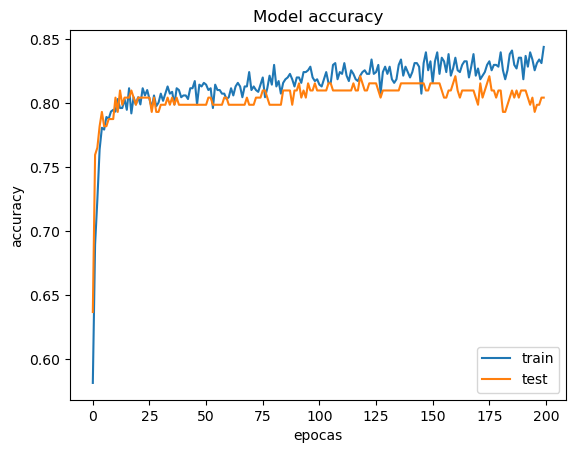

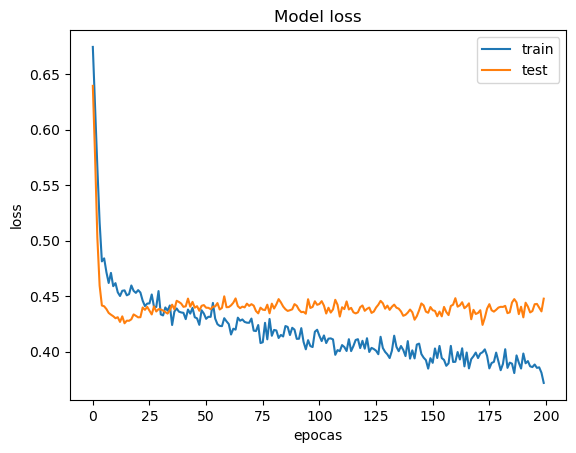

In [24]:
# summarize history for acc
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epocas')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epocas')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [25]:
print('Precisión máxima alcanzada en la validación: %.2f' %(max(history.history['val_Accuracy'])*100), '%')
print('Precisión máxima alcanzada en el entrenamiento: %.2f' %(max(history.history['Accuracy'])*100), '%')

Precisión máxima alcanzada en la validación: 82.12 %
Precisión máxima alcanzada en el entrenamiento: 84.41 %


In [26]:
print('Precisión final alcanzada en la validación: %.2f' %(history.history['val_Accuracy'][-1]*100), '%')
print('Precisión final alcanzada en el entrenamiento: %.2f' %(history.history['Accuracy'][-1]*100), '%')


Precisión final alcanzada en la validación: 80.45 %
Precisión final alcanzada en el entrenamiento: 84.41 %


## **5.- Evaluación**

In [27]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
scaler = StandardScaler()
y_pred_scaled = scaler.fit_transform(y_pred)

# Aplicar un umbral de 0.5 a las predicciones escaladas
y_pred_binary = (y_pred_scaled > 0.5)

# Calcular la matriz de confusión
model_cm = confusion_matrix(y_test, y_pred_binary)

# Calcular la precisión del modelo
model_acc = round(accuracy_score(y_test, y_pred_binary) * 100, 2)

# se imprime la matriz 
print("Matriz de confusión:")
print(model_cm)

# se imprime la precisión
print("Precisión:", model_acc, "%")

# informe clasificación.
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_binary))


6/6 [==============================] - 0s 600us/step
Matriz de confusión:
[[94 11]
 [24 50]]
Precisión: 80.45 %
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



## **6.- Despliegue**

In [28]:
test_model = test.drop(['PassengerId'], axis=1)
test_model = scaler_min_max.transform(test_model)
pred = model.predict(test_model)
pred = (pred > 0.5).astype(int)

# Crear un DataFrame de presentación con los resultados
submission = pd.DataFrame({'PassengerId': test['PassengerId'].values.flatten(), 'Survived': pred.flatten()})

# Guardar el archivo de presentación
submission.to_csv("submission.csv", index=False)

14/14 [==============================] - 0s 462us/step


## **7.- Conclusión**

Este proyecto de modelado predictivo nos ha permitido no solo desarrollar y optimizar un modelo de aprendizaje automático, sino también reflexionar sobre las situaciones y comportamientos humanos en tiempos de crisis.

Los datos del Titanic, aunque son un conjunto de datos histórico, nos muestran una imagen clara de la injusticia y la desigualdad social. El hecho de que algunos hombres se disfrazaran de mujeres para sobrevivir pone de manifiesto el instinto de supervivencia, pero también plantea cuestiones éticas sobre la igualdad y la equidad. Igualmente, la mayor tasa de supervivencia de los pasajeros de primera clase evidencia la brecha social y económica que existía y que, lamentablemente, sigue existiendo en muchos contextos hoy en día.

En este punto, es interesante detenerse y considerar desde una perspectiva filosófica las implicaciones de este tipo de modelos predictivos. Emmanuel Kant, argumentaba que la ética de nuestras acciones debería basarse en la universalidad, es decir, si la acción podría aplicarse en todos los casos sin contradicción. En este sentido, ¿es ético que creemos un modelo que priorice la ayuda a ciertos individuos basándose en sus características? ¿O estamos simplemente perpetuando la discriminación y la desigualdad, aunque de una manera diferente? Es un tema que da lugar a un interesante debate.

Además, si pensamos en aplicar este tipo de modelos predictivos para prever enfermedades o incumplimientos de préstamos, nos encontramos con la pregunta de qué tanto deberíamos confiar en los pronósticos de una máquina. ¿No estaríamos cayendo en una especie de determinismo tecnológico que niega la libertad individual y la capacidad de cambio y adaptación?

En cuanto a nuestro modelo, hemos logrado una precisión cercana al 80% en la validación, lo cual es un resultado razonablemente bueno para un primer intento. No obstante, siempre hay margen para mejorar. Podríamos considerar explorar otras técnicas de preprocesamiento de datos, probar diferentes arquitecturas de red neuronal o incluso utilizar otros algoritmos de aprendizaje automático.

Para hacer este proyecto más interactivo y accesible al público general, podríamos considerar la creación de una aplicación web interactiva. Esta aplicación podría permitir a los usuarios introducir sus propios datos y obtener predicciones del modelo. No solo proporcionaría una experiencia de aprendizaje divertida, sino que también ayudaría a ilustrar cómo funcionan los modelos de machine learning y cómo pueden aplicarse en el mundo real.

### ***Autoevaluación y coevaluación***

In [29]:
data = [
    ['7', '7'],
    [6.5, 7]
]

df = pd.DataFrame(data, index=['Luckas Reyes Gómez', 'Renzo Massa Heríquez'], columns=['Luckas', 'Renzo'])

df = df.T
df


,Luckas Reyes Gómez,Renzo Massa Heríquez
Luckas,7,6.5
Renzo,7,7
